In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [20]:
xdata = np.linspace(0, 10, 11)

def func(x):
    noise = np.random.uniform(-0.2 * x*x , 0.2 * x*x )
    return x*x + noise

ydata= func(xdata)  

In [22]:
def q2(x, a,b,c):
    return a*x*x+b*x+c;

In [23]:
popt, pcov = curve_fit(q2, xdata, ydata)

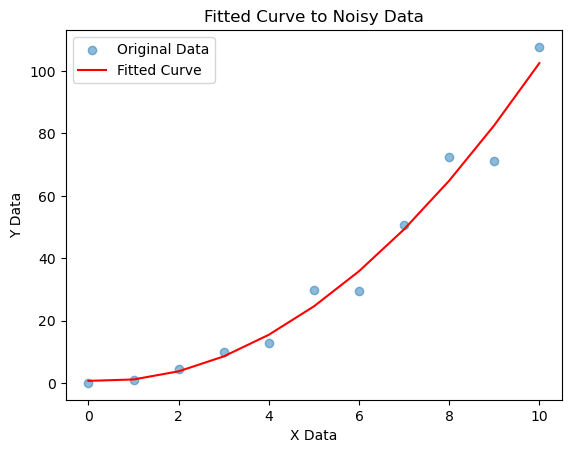

In [24]:
plt.scatter(xdata, ydata, label='Original Data', alpha=0.5)
plt.plot(xdata, q2(xdata, *popt), color='red', label='Fitted Curve')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.legend()
plt.title('Fitted Curve to Noisy Data')
plt.show()